In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np


In [2]:

# Load train and test datasets, specifying low_memory=False to avoid mixed-type issues
train_df = pd.read_csv("GUIDE_train.csv", low_memory=False)
test_df = pd.read_csv("GUIDE_test.csv", low_memory=False)


In [3]:
train_df.head(20)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
5,1322849927433,11,417400,825450,2024-06-10T13:30:56.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,8,6,3
6,163208760309,522,566,705663,2024-06-14T23:19:45.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
7,1400159339557,125,38679,47423,2024-06-06T13:39:23.000Z,313,3919,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
8,1219770713645,21,414,197969,2024-06-09T10:21:29.000Z,3,4,SuspiciousActivity,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9,1073741827836,72,70,831157,2024-06-08T02:08:01.000Z,4,3,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
test_df.head(20)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
5,670014899930,0,238,378946,2024-06-06T08:10:50.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
6,1194000913330,133,105333,732769,2024-06-15T04:06:55.000Z,3,4,SuspiciousActivity,NaN,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
7,678604832796,6,2461,1523,2024-05-26T11:48:38.000Z,17,1265,Impact,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
8,618475292265,7,5177,1815,2024-05-25T17:57:20.000Z,21,528,Impact,NaN,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
9,438086667998,100,7060,9787,2024-06-02T05:46:22.000Z,72,53,Impact,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [5]:
train_df.shape

(9516837, 45)

In [6]:
test_df.shape

(4147992, 46)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [9]:
train_df.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [10]:
test_df.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [11]:
train_df['Category'].unique()

array(['InitialAccess', 'Exfiltration', 'CommandAndControl', 'Execution',
       'SuspiciousActivity', 'Impact', 'Collection', 'CredentialAccess',
       'Persistence', 'Discovery', 'Malware', 'DefenseEvasion', 'Exploit',
       'PrivilegeEscalation', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'CredentialStealing', 'WebExploit',
       'Weaponization'], dtype=object)

In [12]:
test_df['Category'].unique()

array(['LateralMovement', 'CommandAndControl', 'InitialAccess',
       'Discovery', 'SuspiciousActivity', 'Impact', 'CredentialAccess',
       'Exfiltration', 'UnwantedSoftware', 'DefenseEvasion', 'Malware',
       'Execution', 'Persistence', 'CredentialStealing', 'Collection',
       'Ransomware', 'Exploit', 'PrivilegeEscalation', 'WebExploit'],
      dtype=object)

In [13]:
train_df['EntityType'].unique()

array(['Ip', 'User', 'Url', 'MailMessage', 'Process', 'Machine',
       'CloudApplication', 'AzureResource', 'File', 'Mailbox',
       'CloudLogonRequest', 'MailCluster', 'Malware', 'CloudLogonSession',
       'OAuthApplication', 'RegistryValue', 'SecurityGroup',
       'RegistryKey', 'GenericEntity', 'ActiveDirectoryDomain',
       'BlobContainer', 'Blob', 'MailboxConfiguration', 'IoTDevice',
       'AmazonResource', 'Nic', 'Container', 'GoogleCloudResource',
       'KubernetesCluster', 'ContainerImage', 'KubernetesNamespace',
       'KubernetesPod', 'ContainerRegistry'], dtype=object)

In [14]:
test_df['EntityType'].unique()

array(['User', 'Machine', 'Process', 'CloudLogonSession', 'Ip', 'File',
       'MailMessage', 'CloudLogonRequest', 'Url', 'CloudApplication',
       'MailCluster', 'Mailbox', 'RegistryValue', 'AzureResource',
       'GenericEntity', 'Malware', 'RegistryKey', 'OAuthApplication',
       'Blob', 'MailboxConfiguration', 'SecurityGroup', 'BlobContainer',
       'ActiveDirectoryDomain', 'Nic', 'IoTDevice', 'KubernetesNamespace',
       'KubernetesCluster', 'GoogleCloudResource', 'AmazonResource'],
      dtype=object)

In [15]:
train_df['EvidenceRole'].unique()

array(['Related', 'Impacted'], dtype=object)

In [16]:
test_df['EvidenceRole'].unique()

array(['Impacted', 'Related'], dtype=object)

In [17]:
train_df['DeviceName'].nunique()

114541

### To check Consistency of unique values

In [18]:
# Get unique values in the column from both datasets
unique_train = set(train_df['Category'].unique())
unique_test = set(test_df['Category'].unique())

# Check if test set values are a subset of training set values
is_subset = unique_test.issubset(unique_train)
print(is_subset)  # Should return True if test set has no new unique values


True


In [19]:
train_df['AlertTitle'].unique()

array([     6,     43,    298, ..., 111967, 112743, 110883], dtype=int64)

### Feature Engineering

In [20]:
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'], errors='coerce')
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'], errors='coerce')

In [21]:
# Extract year, month, day, and hour from the Timestamp column
train_df['Year'] = train_df['Timestamp'].dt.year
train_df['Month'] = train_df['Timestamp'].dt.month
train_df['Day'] = train_df['Timestamp'].dt.day
train_df['Hour'] = train_df['Timestamp'].dt.hour

# Similarly for test_df
test_df['Year'] = test_df['Timestamp'].dt.year
test_df['Month'] = test_df['Timestamp'].dt.month
test_df['Day'] = test_df['Timestamp'].dt.day
test_df['Hour'] = test_df['Timestamp'].dt.hour

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 49 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Id                  int64              
 1   OrgId               int64              
 2   IncidentId          int64              
 3   AlertId             int64              
 4   Timestamp           datetime64[ns, UTC]
 5   DetectorId          int64              
 6   AlertTitle          int64              
 7   Category            object             
 8   MitreTechniques     object             
 9   IncidentGrade       object             
 10  ActionGrouped       object             
 11  ActionGranular      object             
 12  EntityType          object             
 13  EvidenceRole        object             
 14  DeviceId            int64              
 15  Sha256              int64              
 16  IpAddress           int64              
 17  Url                 int64  

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 50 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Id                  int64              
 1   OrgId               int64              
 2   IncidentId          int64              
 3   AlertId             int64              
 4   Timestamp           datetime64[ns, UTC]
 5   DetectorId          int64              
 6   AlertTitle          int64              
 7   Category            object             
 8   MitreTechniques     object             
 9   IncidentGrade       object             
 10  ActionGrouped       object             
 11  ActionGranular      object             
 12  EntityType          object             
 13  EvidenceRole        object             
 14  DeviceId            int64              
 15  Sha256              int64              
 16  IpAddress           int64              
 17  Url                 int64  

In [24]:
columns_to_drop = [
    'MitreTechniques', 
    'ActionGrouped', 
    'ActionGranular', 
    'EmailClusterId', 
    'ThreatFamily', 
    'ResourceType', 
    'Roles', 
    'AntispamDirection', 
    'SuspicionLevel', 
    'LastVerdict'
]

In [25]:
# Drop columns from the training DataFrame
train_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Drop columns from the testing DataFrame
test_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [26]:
# Check remaining columns in train and test DataFrames
print("Remaining columns in training DataFrame:")
print(train_df.columns)

print("\nRemaining columns in testing DataFrame:")
print(test_df.columns)


Remaining columns in training DataFrame:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

Remaining columns in testing DataFrame:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       

In [27]:
# Check null values in IncidentGrade for both DataFrames
print("Null values in IncidentGrade (train):", train_df['IncidentGrade'].isnull().sum())
print("Null values in IncidentGrade (test):", test_df['IncidentGrade'].isnull().sum())


Null values in IncidentGrade (train): 51340
Null values in IncidentGrade (test): 0


#### just 0.04 percent data of incident grade missing...so delete it not an issue

In [28]:
# Remove rows with null values in IncidentGrade from train_df
train_df = train_df[train_df['IncidentGrade'].notnull()]


In [29]:
# Check for null values again
print("Null values in IncidentGrade (train) after handling:", train_df['IncidentGrade'].isnull().sum())


Null values in IncidentGrade (train) after handling: 0


In [30]:
test_df['Usage'].unique()

array(['Private', 'Public'], dtype=object)

In [31]:
test_df['City'].nunique()

6637

In [32]:
train_df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

## Remove Duplicates

In [33]:
# Drop duplicate rows from the DataFrame
train_df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print("Number of rows after removing duplicates:", train_df.shape[0])


Number of rows after removing duplicates: 8922805


In [34]:
# Drop duplicate rows from the DataFrame
test_df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print("Number of rows after removing duplicates:", test_df.shape[0])


Number of rows after removing duplicates: 3922695


In [35]:
train_df.shape

(8922805, 39)

In [36]:
test_df.shape

(3922695, 40)

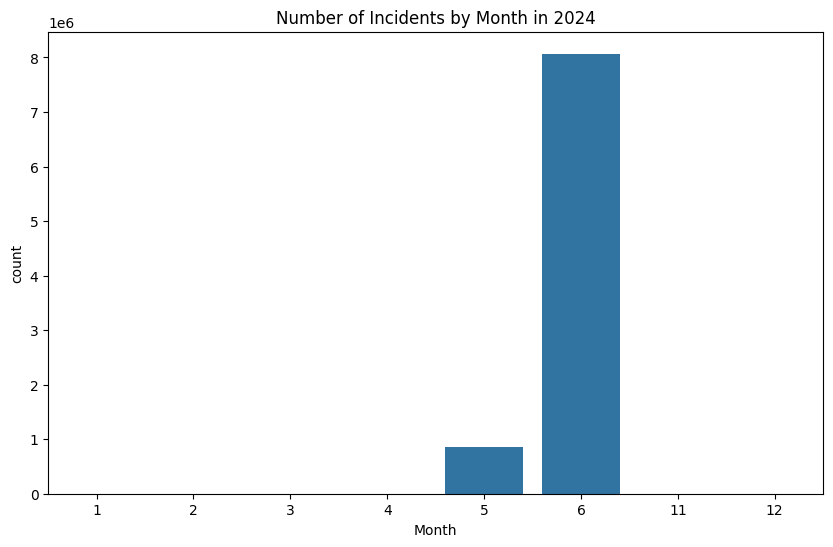

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot number of incidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=train_df)
plt.title('Number of Incidents by Month in 2024')
plt.show()




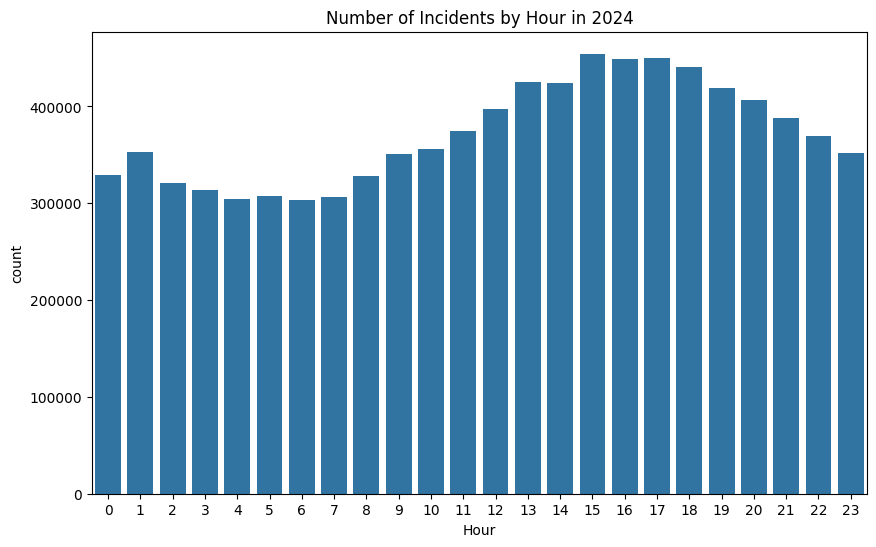

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot number of incidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=train_df)
plt.title('Number of Incidents by Hour in 2024')
plt.show()




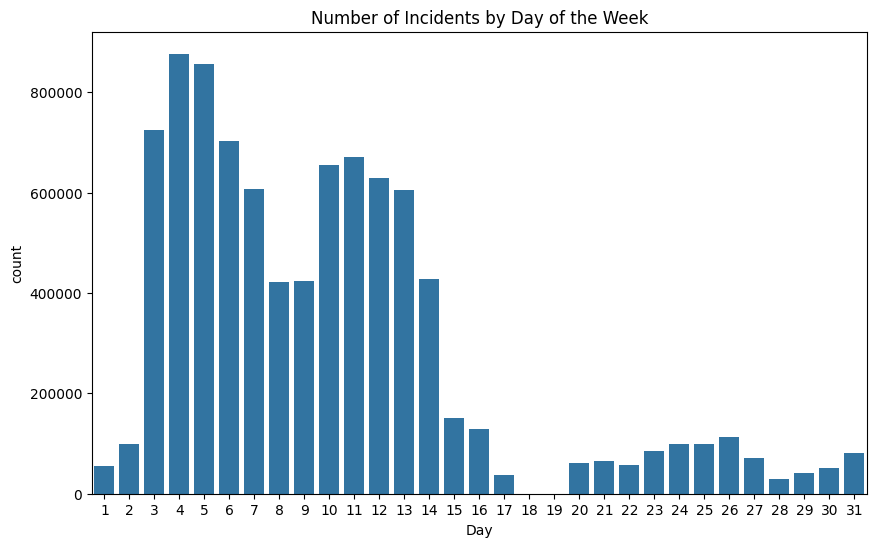

In [39]:
# Plot distribution of incidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day', data=train_df)
plt.title('Number of Incidents by Day of the Week')
plt.show()

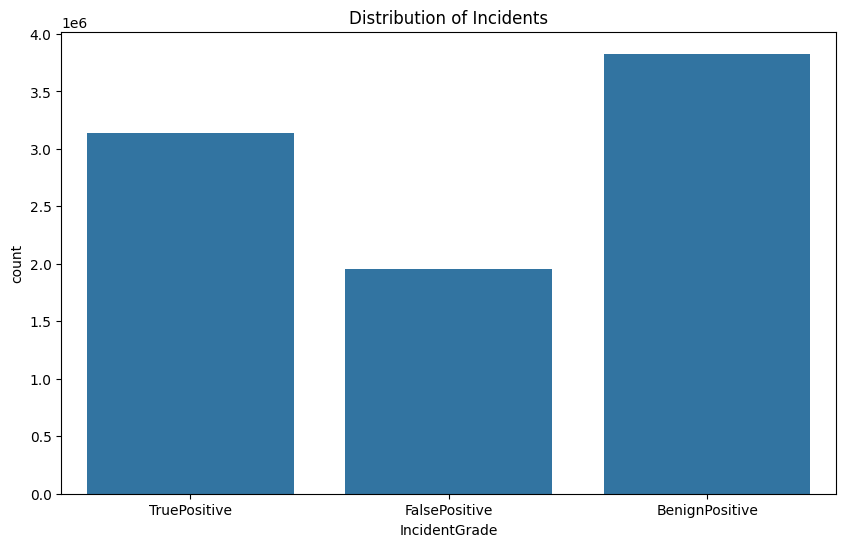

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot number of incidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x='IncidentGrade', data=train_df)
plt.title("Distribution of Incidents")
plt.show()




In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8922805 entries, 0 to 9516836
Data columns (total 39 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Id                  int64              
 1   OrgId               int64              
 2   IncidentId          int64              
 3   AlertId             int64              
 4   Timestamp           datetime64[ns, UTC]
 5   DetectorId          int64              
 6   AlertTitle          int64              
 7   Category            object             
 8   IncidentGrade       object             
 9   EntityType          object             
 10  EvidenceRole        object             
 11  DeviceId            int64              
 12  Sha256              int64              
 13  IpAddress           int64              
 14  Url                 int64              
 15  AccountSid          int64              
 16  AccountUpn          int64              
 17  AccountObjectId     int64       

In [42]:
# Assuming you have already extracted 'Hour', 'Day', 'Month', and 'Year' from 'Timestamp'
train_df.drop(columns=['Timestamp'], inplace=True)
test_df.drop(columns=['Timestamp'], inplace=True)

# Verify that the 'Timestamp' column is removed
print(train_df.columns)
print(test_df.columns)


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthAp

In [43]:
train_df.shape

(8922805, 38)

In [44]:
test_df.shape

(3922695, 39)

In [45]:
train_df['AlertTitle'].mean()

2939.287240503407

In [46]:
train_df['AlertTitle'].median()

14.0

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8922805 entries, 0 to 9516836
Data columns (total 38 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  AccountUpn          int64 
 16  AccountObjectId     int64 
 17  AccountName         int64 
 18  DeviceName          int64 
 19  NetworkMessageId    int64 
 20  RegistryKey         int64 
 21  RegistryValueName   int64 
 22  RegistryValueData   int64 
 23  ApplicationId       int64 
 24  ApplicationName     int64 
 25  OAuthApplicationId  int

In [48]:
train_df.IpAddress.dtype

dtype('int64')

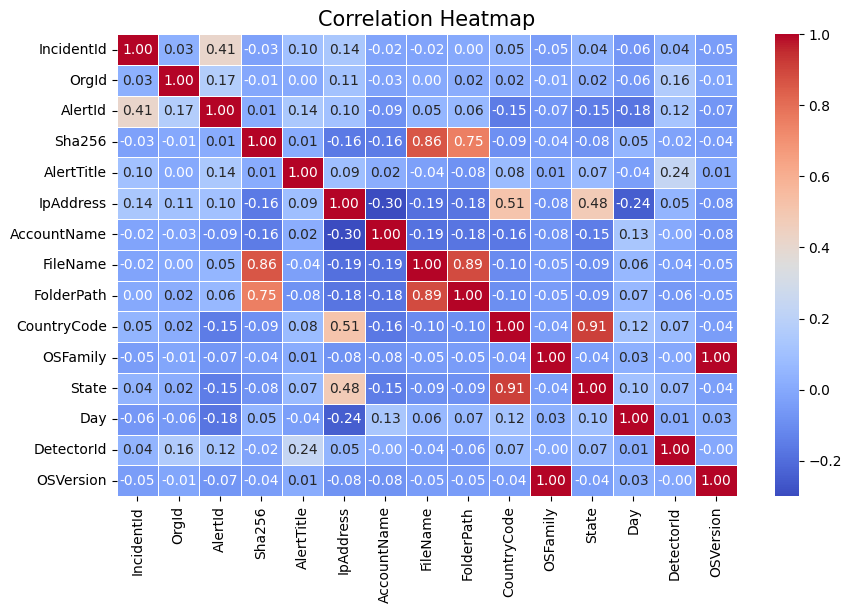

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
# Drop columns that are not needed for the correlation analysis
correlation_columns = ['IncidentId','OrgId','AlertId', 'Sha256', 'AlertTitle','IpAddress','AccountName','FileName','FolderPath',
                       'CountryCode','OSFamily'
                       ,'State','Day','DetectorId','OSVersion']
subset_df = train_df[correlation_columns]

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Set the plot size
plt.figure(figsize=(10, 6))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True,fmt='.2f' ,cmap='coolwarm', linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap', size=15)

# Display the heatmap
plt.show()


In [50]:
train_df['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    3827800
TruePositive      3140126
FalsePositive     1954879
Name: count, dtype: int64

In [51]:
# Assuming 'train_df' is your DataFrame
incident_grade_counts = train_df['IncidentGrade'].value_counts()

# Display the counts
print(incident_grade_counts)


IncidentGrade
BenignPositive    3827800
TruePositive      3140126
FalsePositive     1954879
Name: count, dtype: int64


C:\Users\Srivathsan\AppData\Local\Temp\ipykernel_3476\1249413229.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incident_grade_counts.index, y=incident_grade_counts.values, palette='viridis')


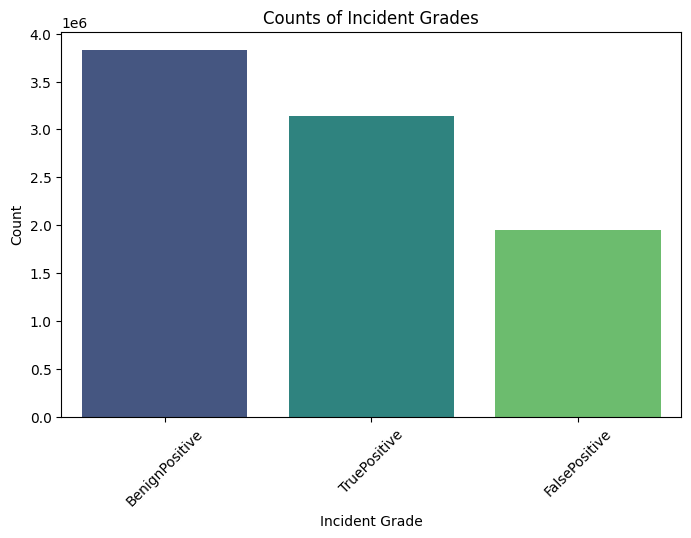

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=incident_grade_counts.index, y=incident_grade_counts.values, palette='viridis')
plt.title('Counts of Incident Grades')
plt.xlabel('Incident Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [53]:
# Count unique values in categorical columns
incident_grade_counts = train_df['IncidentGrade'].value_counts()
evidence_role_counts = train_df['EvidenceRole'].value_counts()
entity_type_counts = train_df['EntityType'].value_counts()

# Display the counts
print("IncidentGrade Counts:\n", incident_grade_counts)
print("\nEvidenceRole Counts:\n", evidence_role_counts)
print("\nEntityType Counts:\n", entity_type_counts)


IncidentGrade Counts:
 IncidentGrade
BenignPositive    3827800
TruePositive      3140126
FalsePositive     1954879
Name: count, dtype: int64

EvidenceRole Counts:
 EvidenceRole
Related     4808045
Impacted    4114760
Name: count, dtype: int64

EntityType Counts:
 EntityType
Ip                       2174998
User                     1879451
MailMessage              1004821
Machine                   696472
File                      682079
CloudLogonRequest         632503
Url                       589305
Mailbox                   345494
Process                   345069
CloudApplication          216797
CloudLogonSession         210556
MailCluster               106784
RegistryValue              11209
AzureResource               8100
RegistryKey                 7277
GenericEntity               4294
OAuthApplication            2595
Malware                     2580
SecurityGroup               1507
BlobContainer                306
Blob                         263
MailboxConfiguration         226

### CHI SQUARE TEST

In [54]:
from scipy import stats

# Create contingency tables for target vs categorical features
contingency_evidence = pd.crosstab(train_df['IncidentGrade'], train_df['EvidenceRole'])
contingency_entity = pd.crosstab(train_df['IncidentGrade'], train_df['EntityType'])

# Perform Chi-squared tests
chi2_stat_evidence, p_value_evidence, dof_evidence, expected_evidence = stats.chi2_contingency(contingency_evidence)
chi2_stat_entity, p_value_entity, dof_entity, expected_entity = stats.chi2_contingency(contingency_entity)

# Display results
print(f"Chi-squared Test: IncidentGrade vs. EvidenceRole")
print(f"Chi-squared Statistic: {chi2_stat_evidence}, p-value: {p_value_evidence:.6f}, Degrees of Freedom: {dof_evidence}")
print("Expected Frequencies:\n", expected_evidence)

print("\nChi-squared Test: IncidentGrade vs. EntityType")
print(f"Chi-squared Statistic: {chi2_stat_entity}, p-value: {p_value_entity:.6f}, Degrees of Freedom: {dof_entity}")
print("Expected Frequencies:\n", expected_entity)


Chi-squared Test: IncidentGrade vs. EvidenceRole
Chi-squared Statistic: 267392.65621521237, p-value: 0.000000, Degrees of Freedom: 2
Expected Frequencies:
 [[1765193.60537409 2062606.39462591]
 [ 901494.30745601 1053384.69254399]
 [1448072.0871699  1692053.9128301 ]]

Chi-squared Test: IncidentGrade vs. EntityType
Chi-squared Statistic: 1778111.9892853934, p-value: 0.000000, Degrees of Freedom: 64
Expected Frequencies:
 [[4.71889725e+00 2.57394396e+00 3.47482434e+03 1.12824543e+02
  1.31271142e+02 9.30038880e+04 2.71337879e+05 9.03265573e+04
  8.57981319e-01 8.57981319e-01 8.57981319e-01 2.92605520e+05
  1.84208589e+03 4.28990659e+00 1.32987104e+01 9.33053826e+05
  8.57981319e-01 8.57981319e-01 8.57981319e-01 2.98779982e+05
  4.58093386e+04 4.31058823e+05 1.48213699e+05 9.69518890e+01
  1.10679590e+03 2.10205423e+01 1.11323076e+03 1.48031378e+05
  3.12176503e+03 4.80855630e+03 6.46488924e+02 2.52806340e+05
  8.06266924e+05]
 [2.40996738e+00 1.31452766e+00 1.77461234e+03 5.76201292e+01


In [55]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats

# Sample data
TP_count = train_df[train_df['IncidentGrade'] == 'TruePositive']['AlertId']
FP_count = train_df[train_df['IncidentGrade'] == 'FalsePositive']['AlertId']
BP_count = train_df[train_df['IncidentGrade'] == 'BenignPositive']['AlertId']


# Perform ANOVA
f_statistic, p_value = stats.f_oneway(TP_count, FP_count, BP_count)

# Display the results
print(f"F-statistic: {f_statistic}, p-value: {p_value}")



F-statistic: 91919.81251164922, p-value: 0.0


In [56]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named train_df
# Replace 'column_name' with the name of the column you want to check for outliers
mean = train_df['AlertId'].mean()
std_dev = train_df['AlertId'].std()
threshold = 3

# Calculate Z-scores
z = (train_df['AlertId'] - mean) / std_dev

# Identify outliers
outliers = train_df[(z > threshold) | (z < -threshold)]
print(outliers)


Empty DataFrame
Columns: [Id, OrgId, IncidentId, AlertId, DetectorId, AlertTitle, Category, IncidentGrade, EntityType, EvidenceRole, DeviceId, Sha256, IpAddress, Url, AccountSid, AccountUpn, AccountObjectId, AccountName, DeviceName, NetworkMessageId, RegistryKey, RegistryValueName, RegistryValueData, ApplicationId, ApplicationName, OAuthApplicationId, FileName, FolderPath, ResourceIdName, OSFamily, OSVersion, CountryCode, State, City, Year, Month, Day, Hour]
Index: []

[0 rows x 38 columns]


In [57]:
outliers

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour


 NO Outliers Present

In [58]:
train_df['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    3827800
TruePositive      3140126
FalsePositive     1954879
Name: count, dtype: int64

In [59]:
X = train_df.drop(columns=['IncidentGrade'])  # Features
y = train_df['IncidentGrade']                   # Target variable


In [60]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [61]:
categorical_cols = ['Category', 'EntityType', 'EvidenceRole']  # Categorical columns in your dataset
numerical_cols = X.select_dtypes(include=['int64', 'int32','float64']).columns  # Automatically select numerical columns


In [62]:
# Step 1: Preprocessing - OneHotEncode the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Keep numerical columns as they are
        ('cat', OneHotEncoder(), categorical_cols)  # OneHotEncode categorical columns
    ]
)

# Step 2: Create a pipeline for preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)  # Only preprocessing at this stage
])

In [63]:
# Step 3: Transform the features using the pipeline
X_transformed = pipeline.fit_transform(X)

# Step 4: Split data into training and validation sets before SMOTE
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, stratify=y, random_state=42)


In [64]:

# Step 5: Scale the resampled training data
X_train = StandardScaler().fit_transform(X_train)

# Step 6: Scale the validation data using the same scaler fitted on the training set
X_val_scaled = StandardScaler().fit_transform(X_val)


In [65]:
from sklearn.ensemble import RandomForestClassifier

RandomForest

In [66]:
model_pipeline = Pipeline(steps=[
    ('Classifier',RandomForestClassifier(random_state=42))
])

In [67]:
# Step 7: Train the model using the resampled data
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('Classifier', RandomForestClassifier(random_state=42))])

In [68]:
# Step 8: Evaluate on the validation set
val_predictions = model_pipeline.predict(X_val)

In [73]:
# Step 3: Make predictions using the trained model
from sklearn.metrics import precision_score, recall_score



# Step 4: Calculate metrics (use y_test for evaluation)
accuracy = accuracy_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions, average='macro')  # You can change 'weighted' to 'macro' or 'micro'
recall = recall_score(y_val, val_predictions, average='macro')
precision = precision_score(y_val, val_predictions, average='macro')


In [74]:
# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.5f}")
print(f"Recall: {recall:.5f}")
print(f"Precision: {precision:.5f}")

Accuracy: 0.94
F1-Score: 0.93412
Recall: 0.92378
Precision: 0.94920


In [69]:
#(Optional) If you want to evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_val, val_predictions))

                precision    recall  f1-score   support

BenignPositive       0.89      0.99      0.94    765560
 FalsePositive       0.97      0.86      0.91    390976
  TruePositive       0.99      0.92      0.95    628025

      accuracy                           0.94   1784561
     macro avg       0.95      0.92      0.93   1784561
  weighted avg       0.94      0.94      0.94   1784561



In [81]:
# Step 1: Drop unnecessary columns from the test DataFrame
X_test = test_df.drop(columns=['IncidentGrade', 'Usage'])  # Adjust according to your actual DataFrame



# Step 3: Use the preprocessor pipeline to transform the test data
X_test_processed = pipeline.transform(X_test)  # Use the pipeline fitted on training data


In [82]:

test_predictions = model_pipeline.predict(X_test_processed)

In [83]:
# Step 3: Make predictions using the trained model
from sklearn.metrics import precision_score, recall_score


y_test = test_df['IncidentGrade'] 
# Step 4: Calculate metrics (use y_test for evaluation)
accuracy = accuracy_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions, average='macro')  # You can change 'weighted' to 'macro' or 'micro'
recall = recall_score(y_test, test_predictions, average='macro')
precision = precision_score(y_test, test_predictions, average='macro')


In [84]:
# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.5f}")
print(f"Recall: {recall:.5f}")
print(f"Precision: {precision:.5f}")

Accuracy: 0.88
F1-Score: 0.86943
Recall: 0.85664
Precision: 0.89299


In [85]:
#(Optional) If you want to evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

                precision    recall  f1-score   support

BenignPositive       0.82      0.96      0.88   1630942
 FalsePositive       0.91      0.73      0.81    868897
  TruePositive       0.95      0.88      0.91   1422856

      accuracy                           0.88   3922695
     macro avg       0.89      0.86      0.87   3922695
  weighted avg       0.89      0.88      0.88   3922695



In [86]:
#Create confusion matrix using crosstab
confusion = pd.crosstab(y_test, test_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)


In [89]:
from joblib import dump

dump(model_pipeline, 'random_forest_model.joblib')


['random_forest_model.joblib']